In [1]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torchlensmaker as tlm

from xxchallenge import *


# Parameters
A = tlm.parameter(-1.62)
T = 0.0
NY = tlm.parameter(90.0)
NZ = tlm.parameter(0.0)
RZ = 0

cylinder = tlm.ImplicitCylinder(*torch.tensor([-50/2, 50/2, 37.02/2], dtype=torch.float64).unbind())

# Primary mirror
primary = tlm.Parabola(1800, A=A, normalize=True)
primary_data = StoreVar(lambda data: data)

# Optical model
optics = tlm.Sequential(
    tlm.Gap(-1000),
    XXLightSource.load(),
    #RaysViewerPlane(2000, "input"),
    tlm.Gap(998),   ## bottom margin
    tlm.Translate3D(y=T),
    tlm.Rotate3D(z=RZ),
    primary_data,
    tlm.ReflectiveSurface(primary),
    Focus(primary),
    #tlm.FocalPoint(),
    BoxLoss(450, 1.0, 0.1),
    tlm.Rotate3D(y=NY, z=NZ),
    NonImagingRod(cylinder),
)

xxrender(optics, sampling={"xx": 50, "letter": "both"})

[  1/100] L= 1.25774 | grad norm= 0.3712293398271911
[  6/100] L= 1.04123 | grad norm= 0.21405635139382134
[ 11/100] L= 1.43339 | grad norm= 0.560395309030101
[ 16/100] L= 1.28069 | grad norm= 0.7420203310318587
[ 21/100] L= 1.39351 | grad norm= 0.565066265108943
[ 26/100] L= 1.04859 | grad norm= 0.352396818956308
[ 31/100] L= 0.96806 | grad norm= 0.02353725925394394
[ 36/100] L= 1.61719 | grad norm= 0.20432554436217054
[ 41/100] L= 1.51135 | grad norm= 1.0322952668784218
[ 46/100] L= 1.12533 | grad norm= 0.09751243273509128
[ 51/100] L= 0.78987 | grad norm= 0.4206606996467189
[ 56/100] L= 0.99506 | grad norm= 0.23938795767195584
[ 61/100] L= 1.42990 | grad norm= 0.3147501136739515
[ 66/100] L= 1.24154 | grad norm= 0.740594670034804
[ 71/100] L= 1.26948 | grad norm= 0.34278741938326196
[ 76/100] L= 0.83889 | grad norm= 0.2353673097591104
[ 81/100] L= 1.15284 | grad norm= 0.3682559522070684
[ 86/100] L= 1.03161 | grad norm= 0.3800771035976298
[ 91/100] L= 1.24092 | grad norm= 0.14385157

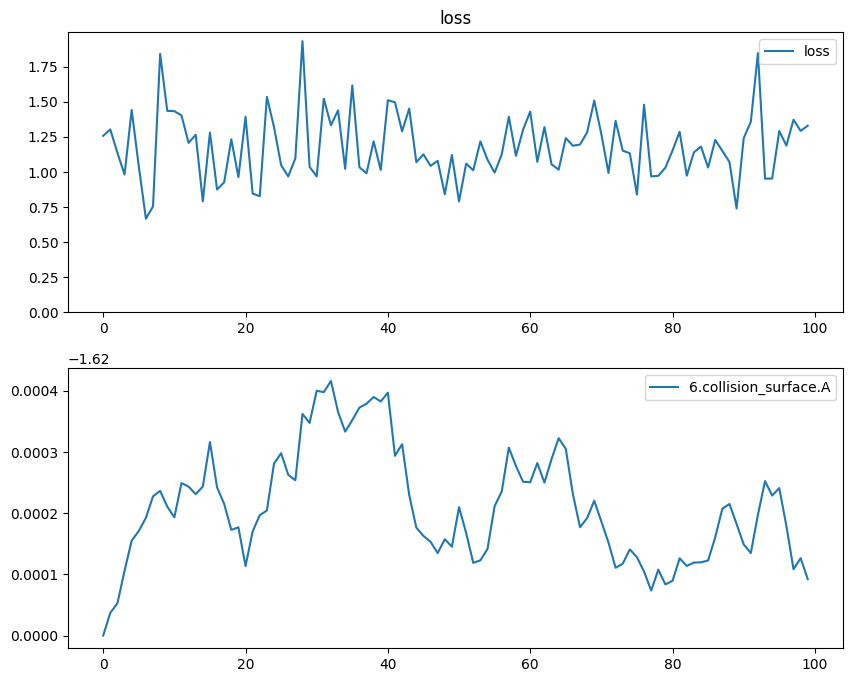

Best loss 0.6668665409088135 at iteration 7 / 100
    6.collision_surface.A tensor(-1.6198, dtype=torch.float64)
    9.y tensor(90., dtype=torch.float64)
    9.z tensor(0., dtype=torch.float64)

Best loss 0.6668665409088135 at iteration 7 / 100
Set 6.collision_surface.A to -1.6198076706875462
A Parameter containing:
tensor(-1.6198, dtype=torch.float64, requires_grad=True)
F -138.90537998532636


In [2]:
         

param_groups = [
    {'params': [A], 'lr': 1e-4},
]

record = tlm.optimize(
    optics,
    optimizer = optim.SGD(param_groups),
    sampling = {"xx": 100, "disable_viewer": True, "letter": "positive"},
    dim = 3,
    num_iter = 100
)


plot_record(record, param_groups, optics)
record.best()

settobest(optics, record, param_groups)

print("A", A)
F = 1./(primary._sag.unnorm(primary.diameter / 2) * 4)
print("F", F.item())

xxrender(optics, sampling={"xx": 50, "letter": "both"})